## <strong style="color:RoyalBlue">Introduction</strong>

* The real estate dataset has 1883 observations in the county where the REIT operates.
* Each observation is for the transaction of one property only.
* Each transaction was between 200,000 and 800,000.

We have the following features:

Target variable
* 'tx_price' - Transaction price in USD

Public records for the property
* 'tx_year' - Year the transaction took place
* 'property_tax' - Monthly property tax
* 'insurance' - Cost of monthly homeowner's insurance

Property characteristics
* 'beds' - Number of bedrooms
* 'baths' - Number of bathrooms
* 'sqft' - Total floor area in squared feet
* 'lot_size' - Total outside area in squared feet
* 'year_built' - Year property was built
* 'basement' - Does the property have a basement?

Location convenience scores
* 'restaurants' - Number of restaurants within 1 mile
* 'groceries' - Number of grocery stores within 1 mile
* 'nightlife' - Number of nightlife venues within 1 mile
* 'cafes' - Number of cafes within 1 mile
* 'shopping' - Number of stores within 1 mile
* 'arts_entertainment' - Number of arts and entertainment venues within 1 mile
* 'beauty_spas' - Number of beauty and spa locations within 1 mile
* 'active_life' - Number of gyms, yoga studios, and sports venues within 1 mile

Neighborhood demographics
* 'median_age' - Median age of the neighborhood
* 'married' - Percent of neighborhood who are married
* 'college_grad' - Percent of neighborhood who graduated college

Schools
* 'num_schools' - Number of public schools within district
* 'median_school' - Median score of the public schools within district, on the range 1 - 10

## <strong style="color:RoyalBlue">Library Imports</strong>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
pd.set_option('display.max_columns',100)

In [2]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [3]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

import pickle

In [4]:
from sklearn.metrics import r2_score

from sklearn.metrics import mean_absolute_error

In [5]:
df = pd.read_csv('real_estate_data.csv')
df.shape

(1883, 26)

In [6]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


## <strong style="color:RoyalBlue">Exploratory Analysis</strong>

In [7]:
df.dtypes

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object

In [8]:
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


In [9]:
df.isnull().sum()

tx_price                0
beds                    0
baths                   0
sqft                    0
year_built              0
lot_size                0
property_type           0
exterior_walls        223
roof                  354
basement              226
restaurants             0
groceries               0
nightlife               0
cafes                   0
shopping                0
arts_entertainment      0
beauty_spas             0
active_life             0
median_age              0
married                 0
college_grad            0
property_tax            0
insurance               0
median_school           0
num_schools             0
tx_year                 0
dtype: int64

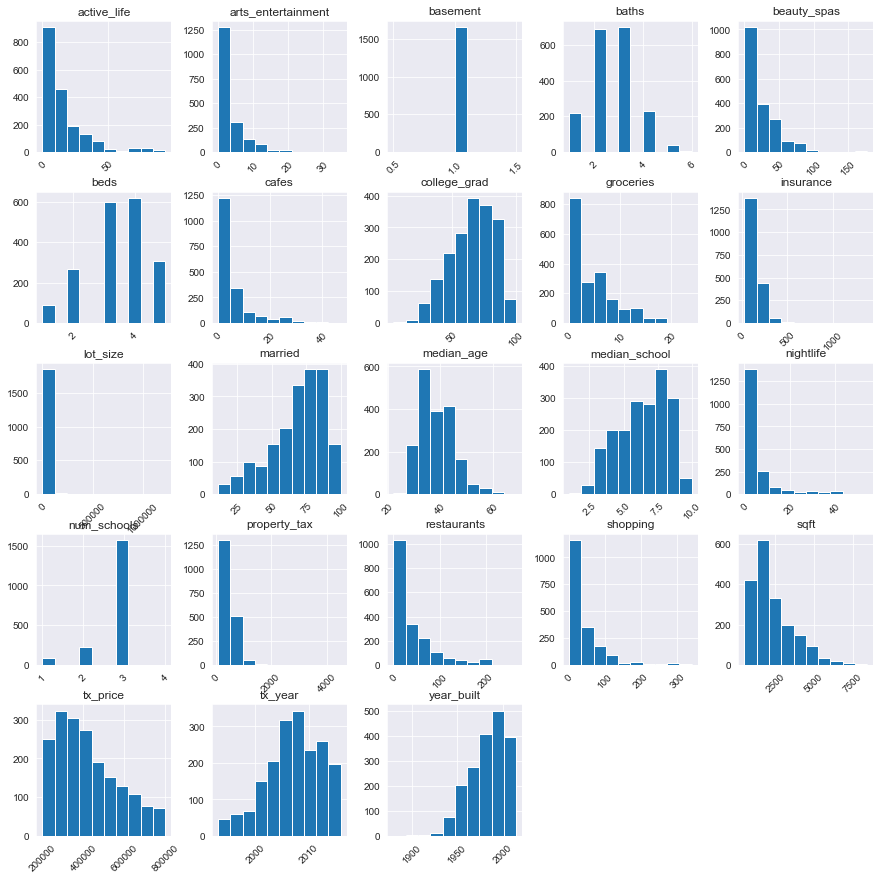

In [10]:
df.hist(figsize=(15,15), xrot=45)
plt.show()

In [11]:
# Summarize categorical features
df.describe(include=['object'])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


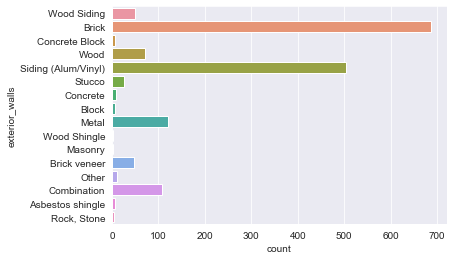

In [12]:
# Bar plot for 'exterior_walls'
sns.countplot(y='exterior_walls', data=df)
plt.show()

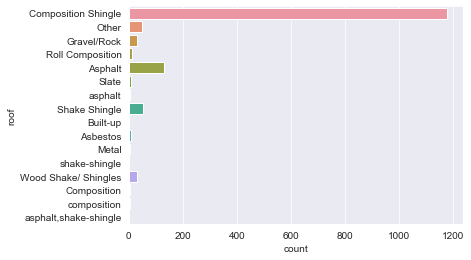

In [13]:
sns.countplot(y='roof', data=df)
plt.show()

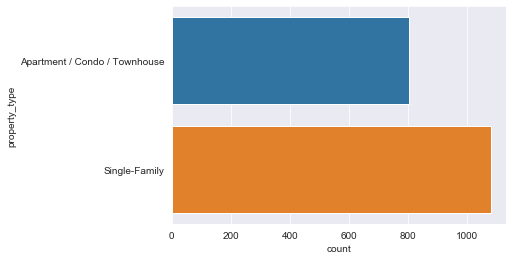

In [14]:
sns.countplot(y='property_type', data=df)
plt.show()

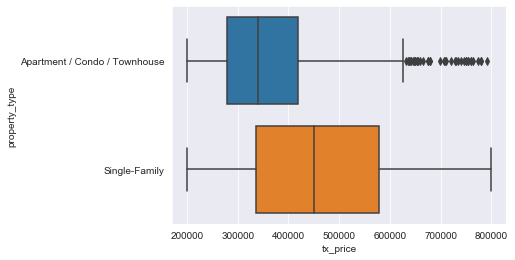

In [15]:
# Segment tx_price by property_type and plot distributions
sns.boxplot(x='tx_price', y='property_type', data=df)
plt.show()

In [16]:
# Segment by property_type and display the means within each class
df.groupby('property_type').mean()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
property_type,,,,,,,,,,,,,,,,,,,,,,,
Apartment / Condo / Townhouse,366614.034869,2.601494,2.200498,1513.727273,1988.936488,3944.239103,1.0,58.418431,5.919054,7.855542,8.037360,57.631382,4.840598,32.087173,22.410959,37.199253,57.534247,66.372354,346.261519,105.652553,6.382316,2.831880,2007.941469
Single-Family,464644.711111,4.029630,2.862037,2935.865741,1978.523148,20417.666667,1.0,26.672222,3.453704,3.007407,3.308333,28.289815,2.318519,16.970370,10.946296,39.643519,77.685185,64.128704,556.383333,166.329630,6.592593,2.764815,2006.494444


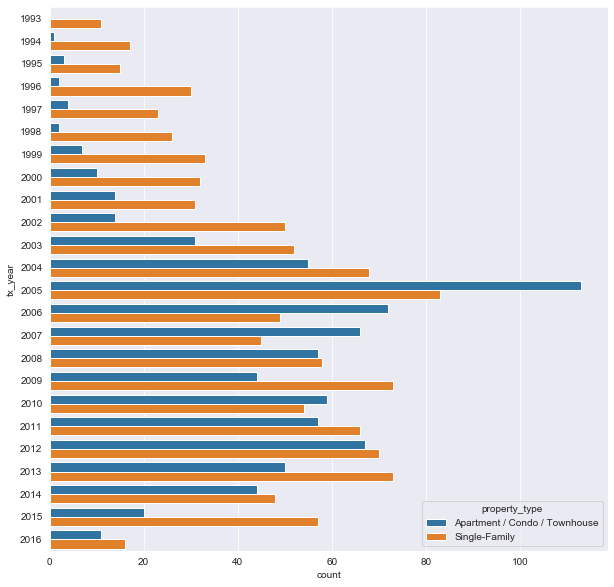

In [17]:
plt.figure(figsize=(10,10))
sns.countplot(y=df.tx_year, hue=df.property_type)
plt.show()

In [18]:
# Calculate correlations between numeric features
correlations = df.corr()
correlations

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
tx_price,1.000000,0.384046,0.389375,0.469573,0.033138,0.130558,NaN,-0.038027,-0.094314,0.009361,-0.001398,-0.038246,-0.021076,-0.054349,-0.001165,0.126335,0.200494,0.268577,0.535148,0.532947,0.175762,-0.014380,0.108782
beds,0.384046,1.000000,0.644572,0.691039,-0.011844,0.164399,NaN,-0.495834,-0.421412,-0.440844,-0.464289,-0.388670,-0.442168,-0.419832,-0.486957,0.133711,0.643240,-0.082354,0.547643,0.485776,0.137309,-0.124359,-0.174081
baths,0.389375,0.644572,1.000000,0.682060,0.206141,0.132976,NaN,-0.350210,-0.340024,-0.306686,-0.316836,-0.259603,-0.305885,-0.282008,-0.329736,0.095844,0.442225,0.016097,0.525776,0.475430,0.163365,-0.088299,-0.132110
sqft,0.469573,0.691039,0.682060,1.000000,0.254589,0.246016,NaN,-0.353759,-0.371167,-0.281540,-0.300969,-0.275586,-0.293402,-0.310465,-0.332663,0.109811,0.480167,0.065343,0.660264,0.594049,0.220669,-0.102032,-0.236190
year_built,0.033138,-0.011844,0.206141,0.254589,1.000000,0.000068,NaN,-0.106948,-0.222443,-0.080006,-0.102209,-0.121684,-0.195141,-0.163670,-0.134919,-0.237152,0.038208,-0.014204,-0.046504,-0.109521,0.155835,-0.188106,-0.043301
lot_size,0.130558,0.164399,0.132976,0.246016,0.000068,1.000000,NaN,-0.113887,-0.118574,-0.072224,-0.098182,-0.116560,-0.067189,-0.121075,-0.092668,0.099140,0.122028,-0.030725,0.165800,0.146579,0.096551,-0.031535,-0.048207
basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurants,-0.038027,-0.495834,-0.350210,-0.353759,-0.106948,-0.113887,NaN,1.000000,0.701462,0.926675,0.937616,0.818815,0.726907,0.867829,0.881799,-0.063816,-0.615584,0.214260,-0.100821,-0.019925,-0.068425,0.251171,0.044739
groceries,-0.094314,-0.421412,-0.340024,-0.371167,-0.222443,-0.118574,NaN,0.701462,1.000000,0.565003,0.602857,0.526356,0.502837,0.626850,0.574532,-0.022377,-0.508793,-0.006025,-0.159506,-0.093974,-0.354553,0.272856,0.115674
nightlife,0.009361,-0.440844,-0.306686,-0.281540,-0.080006,-0.072224,NaN,0.926675,0.565003,1.000000,0.923901,0.743321,0.703038,0.777461,0.858836,-0.028611,-0.568811,0.253717,-0.054386,0.024551,-0.036948,0.196399,0.027495


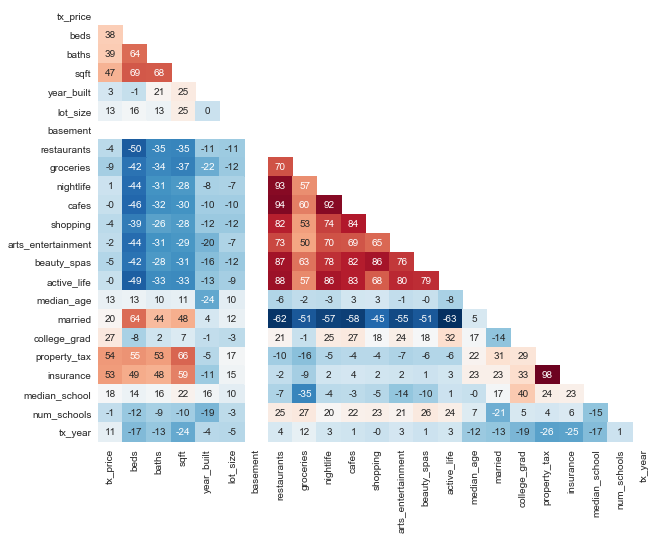

In [19]:
# Change color scheme
sns.set_style('white')

# Make the figsize 10 x 8
plt.figure(figsize=(10,8))

# Generate a mask for the upper triangle
bool_mask = np.zeros_like(correlations)
bool_mask[np.triu_indices_from(correlations)]=1

# Plot heatmap of correlations
sns.heatmap(correlations*100,
            annot=True,
            fmt='.0f',
            cmap='RdBu_r',
            cbar=False,
            mask=bool_mask)

## <strong style="color:RoyalBlue">Data Cleaning</strong>

In [20]:
# Change color scheme
sns.set_style('darkgrid')

In [21]:
# Are there any duplicates?
df.duplicated().sum()

0

In [22]:
# Display unique values of 'basement'
df.basement.unique()

array([nan,  1.])

In [23]:
# Missing basement values should be 0
df.basement.fillna(0, inplace=True)

In [24]:
df.basement.unique()

array([0., 1.])

In [25]:
# 'composition' should be 'Composition'
df.roof.replace('composition', 'Composition', inplace=True)

# 'asphalt' should be 'Asphalt'
df.roof.replace('asphalt', 'Asphalt', inplace=True)

# 'shake-shingle' and 'asphalt,shake-shingle' should be 'Shake Shingle'
df.roof.replace(['shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle', inplace=True)

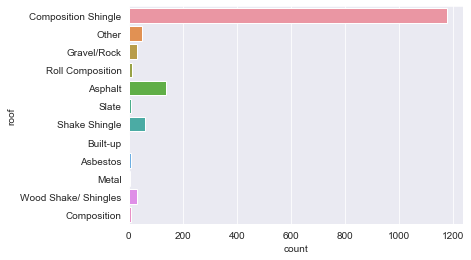

In [26]:
sns.countplot(y='roof', data=df)
plt.show()

In [27]:
df.exterior_walls.replace(['Concrete', 'Block'], 'Concrete Block', inplace=True)

df.exterior_walls.replace('Rock, Stone', 'Masonry', inplace=True)

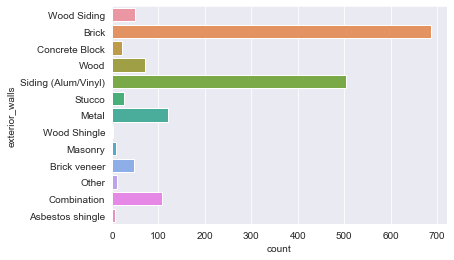

In [28]:
sns.countplot(y='exterior_walls', data=df)
plt.show()

In [29]:
# Fill missing values in exterior_walls with 'Missing'
df.exterior_walls.fillna('Missing', inplace=True)

# Fill missing values in roof with 'Missing'
df.roof.fillna('Missing', inplace=True)

In [30]:
df.isna().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
property_type         0
exterior_walls        0
roof                  0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

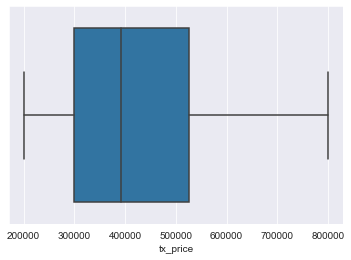

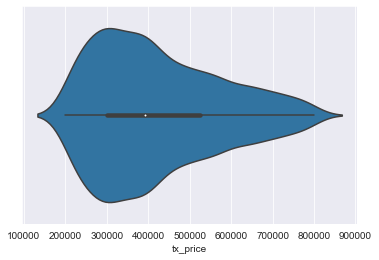

In [31]:
# Box plot of 'tx_price'
sns.boxplot(df.tx_price)
plt.show()

# Violin plot of 'tx_price'
sns.violinplot(df.tx_price)
plt.show()

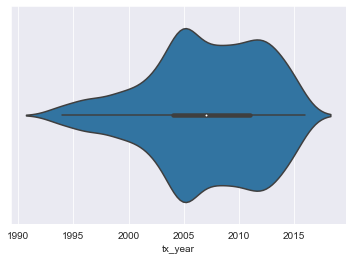

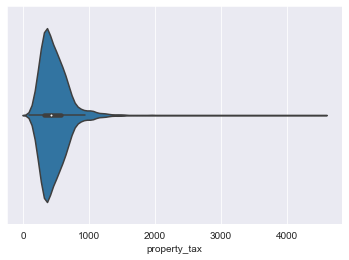

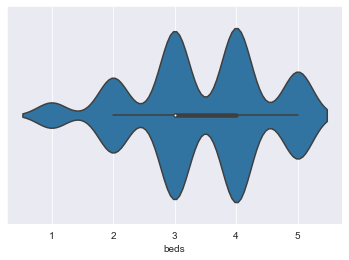

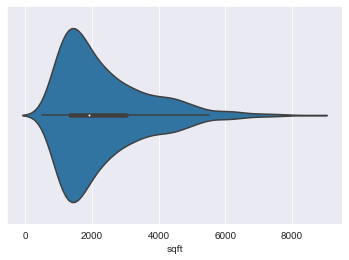

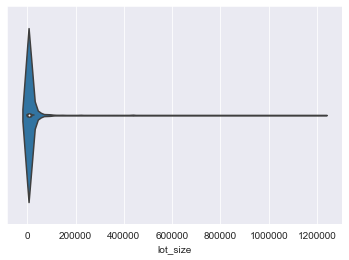

In [32]:
# Violin plot of tx_year
sns.violinplot(df.tx_year)
plt.show()

# Violin plot of property_tax
sns.violinplot(df.property_tax)
plt.show()

# Violin plot of beds
sns.violinplot(df.beds)
plt.show()

# Violin plot of sqft
sns.violinplot(df.sqft)
plt.show()

# Violin plot of lot_size
sns.violinplot(df.lot_size)
plt.show()

In [33]:
df.lot_size.sort_values(ascending=False).head()

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

The largest property has a lot_size of 1,220,551 sqft. The next largest has a lot_size of only 436,471 sqft. Holy smokes! Let's look at this observation a bit closer.

In [34]:
df[ df.lot_size == df.lot_size.max() ]

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
102,292999,2,1,875,1950,1220551,Apartment / Condo / Townhouse,Brick,Missing,0.0,63,11,11,8,39,18,42,44,33.0,35.0,87.0,230.0,79.0,6.0,3.0,2014


Since all of the other observations are below 500,000 sqft, let's remove observations with lot_size greater than 500,000 sqft.

In [35]:
df = df[ df.lot_size <= 500000 ]
df.shape

(1882, 26)

## <strong style="color:RoyalBlue">Feature Engineering</strong>

In [36]:
df['two_and_two'] = ((df.beds == 2) & (df.baths == 2)).astype(int)

In [37]:
df.two_and_two.mean()

0.09458023379383634

In [38]:
# Create a property age feature
df['property_age'] = df.tx_year - df.year_built

In [39]:
# Should not be less than 0
(df.property_age < 0).sum()

19

In [40]:
# Remove records where property_age is less than 0
df = df[ df.property_age >= 0 ]

Let's group sparse classes in categorical features

In [41]:
df.exterior_walls.replace(['Wood Siding', 'Wood Shingle'], 'Wood', inplace=True)

other_ex_walls = ['Stucco', 'Concrete Block', 'Masonry', 'Asbestos shingle']
df.exterior_walls.replace(other_ex_walls, 'Other', inplace=True)

df.roof.replace(['Composition', 'Wood Shake/ Shingles'], 'Composition Shingle', inplace=True)

other_roofs = ['Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal']
df.roof.replace(other_roofs, 'Other', inplace=True)

Because we're modeling housing prices in the United States, it's important to consider the housing market recession. According to data from Zillow, the lowest housing prices were from 2010 to end of 2013 (country-wide).

Let's create a new feature called 'during_recession' to indicate if a transaction falls between 2010 and 2013.

In [42]:
df['during_recession'] = df.tx_year.between(2010, 2013).astype(int)

 Let's create a new feature called 'school_score' that is the product of 'num_schools' and 'median_school'

In [43]:
df['school_score'] = ((df.num_schools) * (df.median_school))

Let's create Analytical Base Table

In [44]:
abt = pd.get_dummies(df, columns=df.columns[df.dtypes=='object'])
abt.shape

(1863, 42)

Since we used 'tx_year' and 'year_built' to create the 'property_age' feature, we can remove them.

In [45]:
abt.drop(['tx_year', 'year_built'], axis=1, inplace=True)
abt.shape

(1863, 40)

## <strong style="color:RoyalBlue">Model Training</strong>

### Data Spending

In [46]:
y = abt.tx_price

X = abt.drop('tx_price', axis=1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [48]:
print(X_train.shape)
print(X_test.shape)

(1490, 39)
(373, 39)


### Pre-Processing & Pipelines

In [49]:
# Create pipelines dictionary
pipelines = {
    'lasso': make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge': make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet' : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf'   : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb'   : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))
}

### Hyperparameter Tuning

In [50]:
# Lasso hyperparameters
lasso_hyperparameters = {
    'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

# Ridge hyperparameters
ridge_hyperparameters = {
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

# Elastic Net hyperparameters
enet_hyperparameters = {
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Random Forest hyperparameters
rf_hyperparameters = {
    'randomforestregressor__n_estimators': [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]
}

# Gradient Boosting hyperparameters
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

In [51]:
# hyperparameters dictionary
hyperparameters = {
    'lasso': lasso_hyperparameters,
    'ridge': ridge_hyperparameters,
    'enet' : enet_hyperparameters,
    'rf'   : rf_hyperparameters,
    'gb'   : gb_hyperparameters
}

## <strong style="color:RoyalBlue">Algorithm Selection</strong>

In [52]:
import time

fitted_models = {}

for name,pipeline in pipelines.items():
    start = time.time()
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    model.fit(X_train, y_train)
    
    fitted_models[name] = model
    
    end = time.time()
    print(name, ' has been fitted. Took ', end - start, ' seconds')

C:\Users\Maulik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26252002000.921875, tolerance: 3410007931.2474647
  positive)


lasso  has been fitted. Took  15.94704270362854  seconds
ridge  has been fitted. Took  2.3490774631500244  seconds
enet  has been fitted. Took  16.52875518798828  seconds
rf  has been fitted. Took  60.06377077102661  seconds
gb  has been fitted. Took  86.42958617210388  seconds


In [53]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


### Winner Model

In [54]:
for name,model in fitted_models.items():
    pred = model.predict(X_test)
    print()
    print(name)
    print('------------')
    print('R2 :', r2_score(y_test, pred))
    print('MAE :', mean_absolute_error(y_test, pred))
    print('Holdout R2 :', model.best_score_)


lasso
------------
R2 : 0.4118769979244269
MAE : 90507.3721259686
Holdout R2 : 0.2908921395447542

ridge
------------
R2 : 0.4134881534969854
MAE : 90412.80855381125
Holdout R2 : 0.29574228507449246

enet
------------
R2 : 0.4183586192402585
MAE : 91407.87462218083
Holdout R2 : 0.32695035387456733

rf
------------
R2 : 0.5235298535090683
MAE : 78601.01670241286
Holdout R2 : 0.4994690235291005

gb
------------
R2 : 0.5087440634979514
MAE : 79397.89624107016
Holdout R2 : 0.48908372444787707


In [55]:
# hyperparameters of winning model
fitted_models['rf'].best_params_

{'randomforestregressor__max_features': 'auto',
 'randomforestregressor__n_estimators': 200}

In [56]:
# winning model
fitted_models['rf'].best_estimator_

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=200, n_jobs=None,
                                       oob_score=False, random_state=123,
                                       verbose=0, warm_start=False))],
         verbose=False)

Let's plot the performance of winning model

Text(0, 0.5, 'Actual')

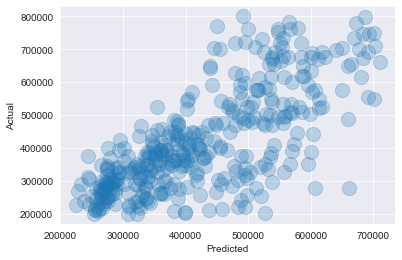

In [57]:
plt.scatter(fitted_models['rf'].predict(X_test), y_test, alpha=0.25, s=200)
plt.xlabel('Predicted')
plt.ylabel('Actual')